## Let's analyze user activity by comparing wekeends and working days

In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('../datasets/checking-logs.sqlite')

#### Analyze only the users and not the admins

In [3]:
sql = """
SELECT timestamp
FROM checker
WHERE uid LIKE "user_%"
"""
df = pd.read_sql(sql, con, parse_dates='timestamp')
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date
df['day_of_week'] = df['timestamp'].dt.day_of_week
df['weekend'] = df['day_of_week'] >= 5 
weekday_commits = (
    df[~df['weekend']].groupby(['date', 'hour']).size().reset_index(name='commits')
)
#print(  df[df['weekend']])
weekend_commits = (df[df['weekend']].groupby(['date', 'hour']).size().reset_index(name='commits')
)
#print(weekend_commits)
avg_weekday = weekday_commits.groupby('hour')['commits'].mean().reset_index()
avg_weekend = weekend_commits.groupby('hour')['commits'].mean().reset_index()
all_hours = pd.DataFrame({'hour': range(24)})
avg_weekend = all_hours.merge(avg_weekend,how='left').fillna(0)
avg_weekday = all_hours.merge(avg_weekday, how='left').fillna(0)
print(avg_weekend)

    hour    commits
0      0   2.000000
1      1   6.000000
2      2   0.000000
3      3   1.000000
4      4   0.000000
5      5   2.000000
6      6   0.000000
7      7   4.000000
8      8   7.000000
9      9   3.666667
10    10   7.000000
11    11  23.600000
12    12   9.500000
13    13  18.000000
14    14  12.428571
15    15  14.250000
16    16  14.800000
17    17   7.142857
18    18   9.714286
19    19  13.125000
20    20  13.000000
21    21  10.285714
22    22   9.833333
23    23   6.400000


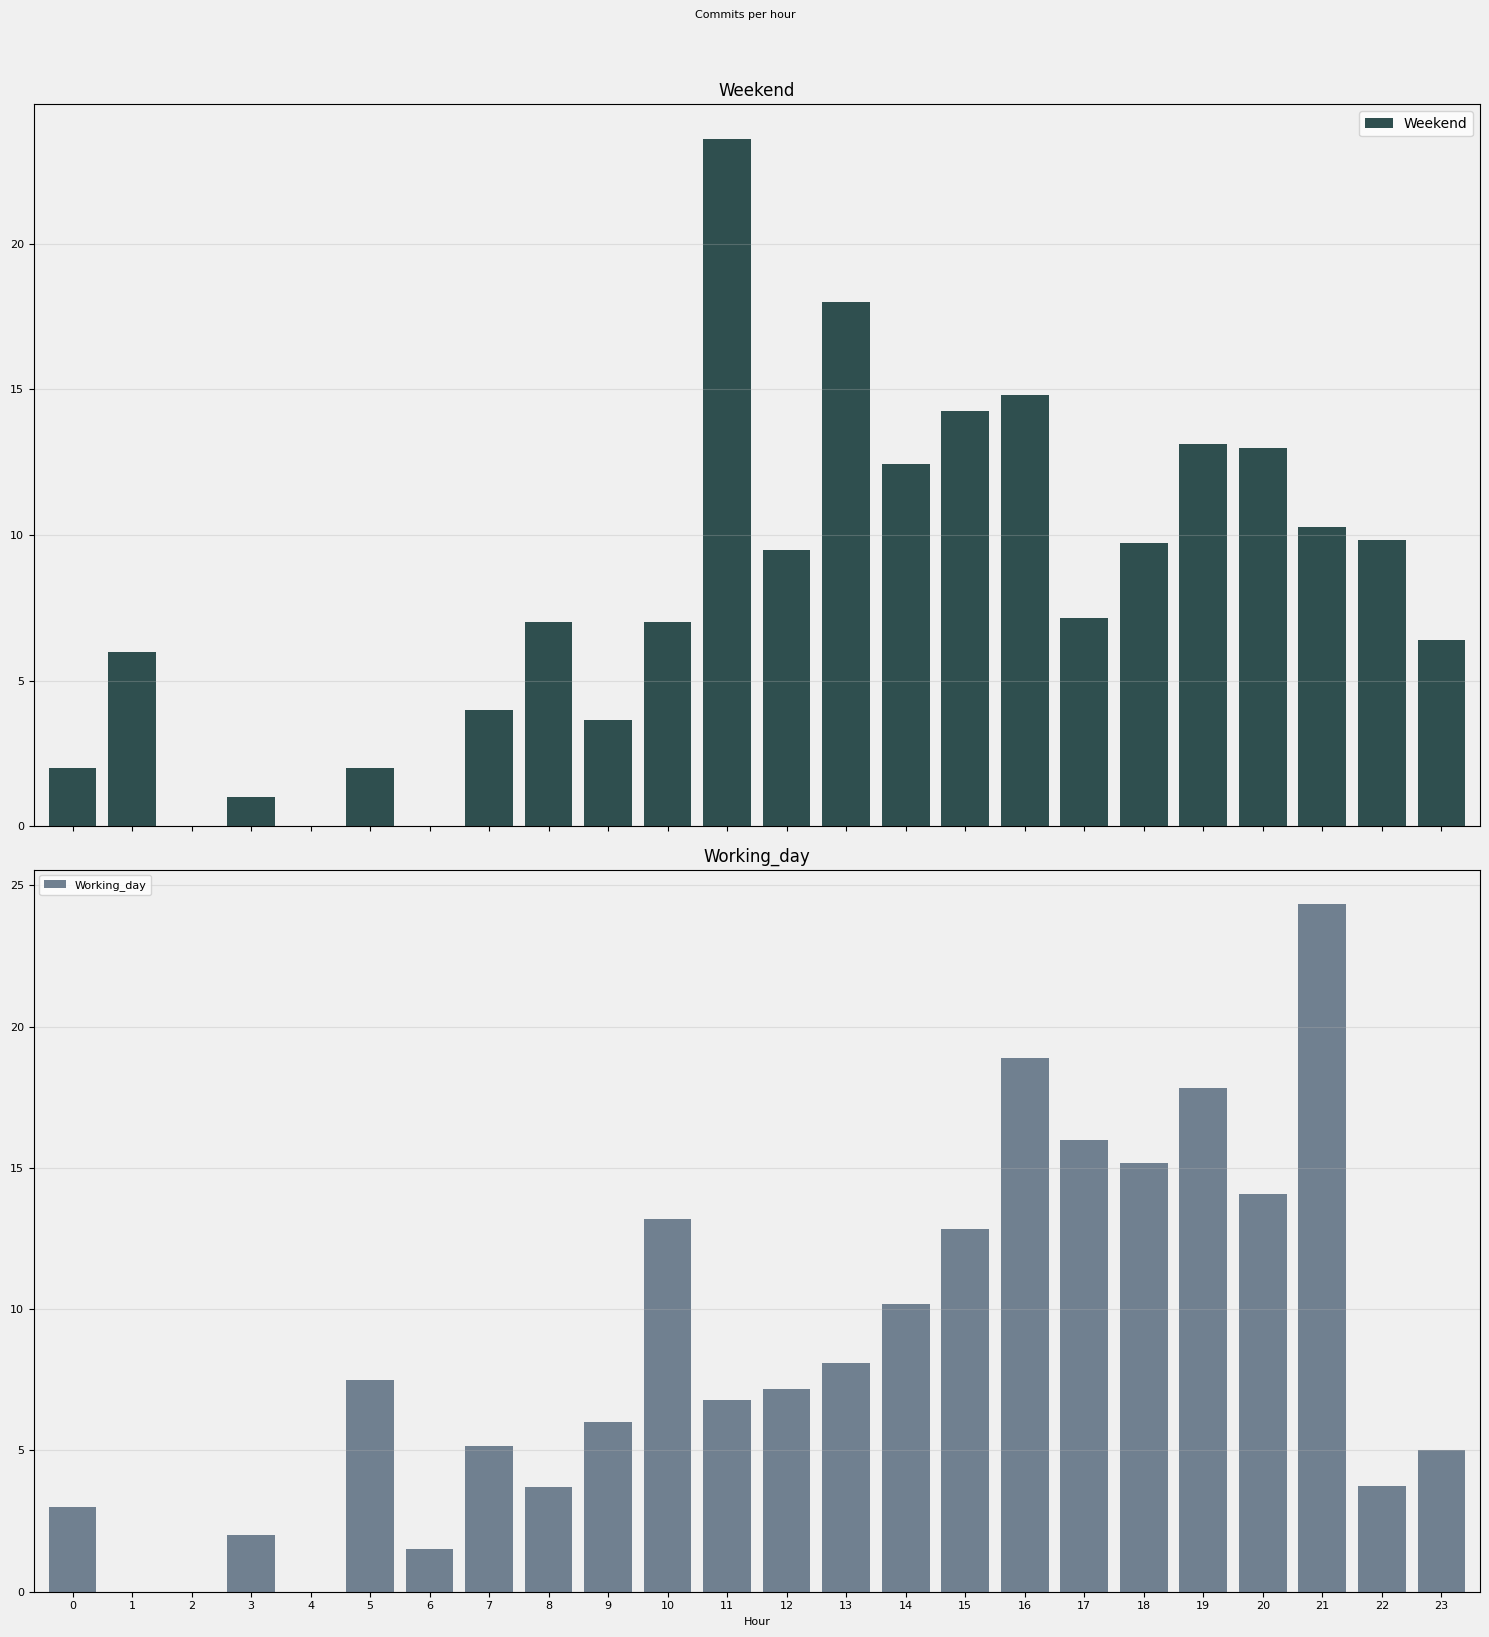

In [ ]:
axs = pd.concat([
    avg_weekend.set_index('hour')['commits'],
    avg_weekday.set_index('hour')['commits']
], axis=1, keys=['Weekend', 'Working_day']).plot(
    kind='bar',
    subplots=True,
    layout=(2, 1),  
    figsize=(15, 16), 
    color=['#2F4F4F', '#708090'],
    fontsize=8,
    rot=0,
    width=0.8,
    sharex=True 
)

for i, ax in enumerate(axs.flatten()):
    ax.grid(axis='y', alpha=0.3)
    if i == 1:  
        ax.set_xlabel('Hour', fontsize=8)

axs[0][0].figure.suptitle('Commits per hour', y=1.02, fontsize=8)
axs[0][0].figure.tight_layout()
axs[1][0].legend(loc='upper left', fontsize=8)
for ax in axs.flatten():
    ax.set_facecolor('#f0f0f0') 
axs[0][0].figure.set_facecolor('#f0f0f0')   



In [5]:
con.close()